In [1]:
import pandas as pd

In [2]:
import loader as load
aak_ge = load.loadGEWithClinical()

c:\Users\Ameno\Desktop\Life\Thesis\Host-Microbial-Omics-Integration\loader.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aak_ge_clinical_types["portion_id"] = aak_ge_clinical_types.apply(lambda row: str(row.portion_id)[:-4], axis=1)
c:\Users\Ameno\Desktop\Life\Thesis\Host-Microbial-Omics-Integration\loader.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aak_ge_clinical_types.drop_duplicates(["portion_id"], inplace=True)


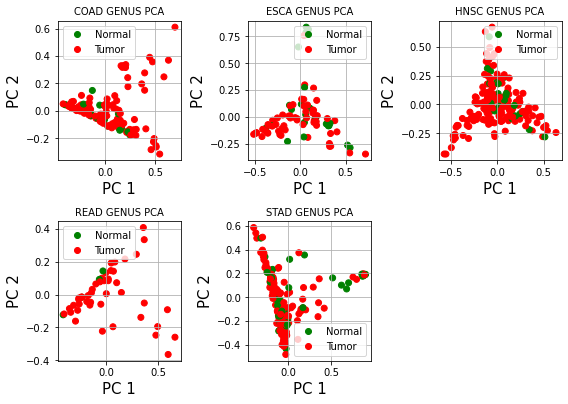

In [3]:
import processor as pr

tcma_cancer_type = ["COAD", "ESCA", "HNSC", "READ", "STAD"]
X, Y, titles = [], [], []

for c in tcma_cancer_type:

    # TCMA Genus data~
    b = load.loadTCMA("genus")
    source = "GENUS"
    file = "TCMA_Genus_PCA_2"

    # TCMA Genus x GE(Aakash) data
    # b = load.loadGEOverlappingTCMA("genus")
    # source = "GENUS n GE"
    # file = "TCMA_Genus_GE(Aakash)_Overlap_PCA"

    # TCMA Phylum data
    # b = load.loadTCMA("phylum")
    # source = "PHYLUM"
    # file = "TCMA_Phylum_PCA"

    # TCMA Phylum x GE(Aakash) data
    # b = load.loadGEOverlappingTCMA("phylum")
    # source = "PHYLUM n GE"
    # file = "TCMA_Phylum_GE(Aakash)_Overlap_PCA"

    # GE(Aakash data)
    # b = aak_ge
    # source = "GE"
    # file = "TCGA_GE(Aakash)_PCA"
    
    load.attachTumorStatus(b)

    x, y = pr.splitData(b, "tumor", project=c)
    X.append(pr.getPCA(x))
    Y.append(y)
    titles.append(f"{c} {source} PCA")
pr.plotScatter(X, Y, titles, f"Visual/{file}")
